# Preliminary Experiment


Assumes that preprocessing step is already done using the matlab functions (output is table which we will convert to pandas dataframe)
* `generate_data.m`
* `resampleRun.m`

In [1]:
%matplotlib widget

In [3]:
!pip install crepe # do this once

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.4/323.4 kB 4.0 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.8/192.8 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.4/313.4 kB 22.1 MB/s eta 0:00:00
  Created wheel for crepe: filename=crepe-0.0.14-py3-none-any.whl size=134848690 sha256=6689c8570d8e054c91b670a41ace6b9eea03004bd3d1b358b9e8840d3f0f1802
  Stored in directory: /Users/sionkim/Library/Caches/pip/wheels/37/07/54/48373749cd1eb9218bc67e1119f4fcdefc49c68ceb85771f48
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320708 sha256=28ec49775dbedf5c01a60a47e7de2e65e317dec1449848bfe525b6752e0a70d7
  Stored in directory: /Users/sionkim/Library/Caches/pip/wheels/86/2c/7d/46a32a246b0e5939cea2c5ec1492164073e0c5d16d666ae2cd
Successfully built crepe resampy


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from scipy.io import wavfile
import crepe

In [5]:
df = pd.read_csv("preliminary_data.csv")

In [6]:
id_columns = df.columns[0:3]
dat_columns = df.columns[3:]

In [7]:
df["data"] = df.apply(lambda x : np.array(x[dat_columns].values), axis=1)

In [8]:
df = df.drop(labels=dat_columns, axis=1)

In [9]:
class_sizes = [len(df.loc[df["label"] == "song"]), len(df.loc[df["label"] == "ad"])]

In [10]:
print(f"Songs: {class_sizes[0]} Ads: {class_sizes[1]}")

Songs: 1992 Ads: 266


## Exploration

In [11]:
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n(N={absolute:d})"

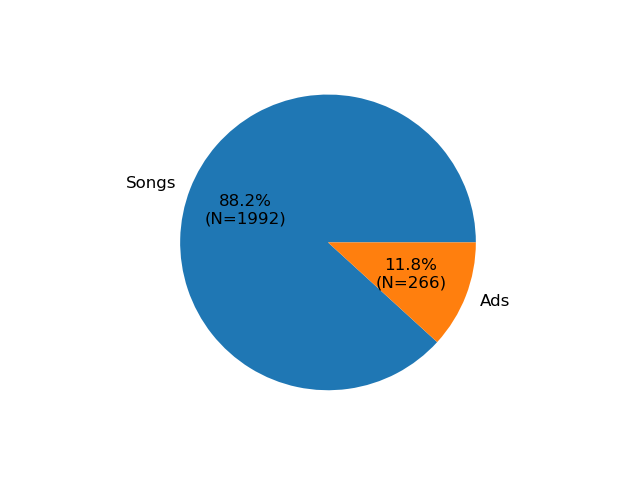

In [12]:
plt.close("all")

fig, ax = plt.subplots()

ax.pie(class_sizes, labels=["Songs", "Ads"], autopct=lambda pct : func(pct, class_sizes), textprops={"fontsize" : 12})

plt.savefig("graphics/preliminary_class_distribution.png", dpi=400)

plt.show()

## Feature extraction

### Pitch

Using [crepe](https://pypi.org/project/crepe/)

In [13]:
songs = [x for x in os.listdir("resampled_songs") if "16kHz" in x]
ads = [x for x in os.listdir("resampled_ads") if "16kHz" in x]

In [14]:
idx = 0

In [15]:
f_s, audio = wavfile.read(f"resampled_songs/{songs[idx]}")

In [16]:
time, frequency, confidence, activation = crepe.predict(audio, f_s, viterbi=True)

490/714 [===================>..........] - ETA: 38s

KeyboardInterrupt: 